### Initial Test 

flatten works as vectorization of row-wise 

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(A)

A_vectorized = A.flatten()
print(A_vectorized)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Function Check - Old Code 

In [8]:
#conversion of the HCP data from Vector --> Matrix

def vectomat(dataset,output_dim):
    '''
    This function is made to convert the  FC value vector of the samples in the dataset 
    to the functional connectivity matrix

    dataset: the dataset with n_samples*n_features
    '''
    #number of samples
    n_samples = dataset.shape[0]
    #empty array to hold the reconstructed FC matrices
    out_dataset = np.zeros((n_samples,output_dim,output_dim))
    #indices for the upper triangle without the diagonal 
    upper_traingle_indices = np.triu_indices(output_dim,k=1)

    #iterating over the samples and making the 

    for i in range(n_samples):
        sample = np.zeros((output_dim,output_dim)) 
        np.fill_diagonal(sample,1)
        sample[upper_traingle_indices] = dataset[i]
        sample = sample + sample.T - np.diag(sample.diagonal())
        out_dataset[i] = sample
    
    # Assuming `all_matrices` is the 3D array created previously
    # Select a random sample
    random_index = np.random.randint(0, n_samples)
    random_sample = out_dataset[random_index]

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(random_sample, cmap='viridis', cbar=True)
    plt.title(f'Heatmap of Random Sample {random_index}')
    plt.show()

    return out_dataset

In [9]:
# initialize a symmetric matrix 
sym = np.array([[1,2,3,4],[2,1,5,6],[3,5,1,7],[4,6,7,1]])
print('Symmteric Matrix')
print(sym)

#extracting the triangle points

upper_traingle_indices = np.triu_indices(sym.shape[0],1)
upper_traingle_vector = sym[upper_traingle_indices]

print('Vectorized Matrix')
print(upper_traingle_vector)





Symmteric Matrix
[[1 2 3 4]
 [2 1 5 6]
 [3 5 1 7]
 [4 6 7 1]]
Vectorized Matrix
[2 3 4 5 6 7]


(2, 1, 6)


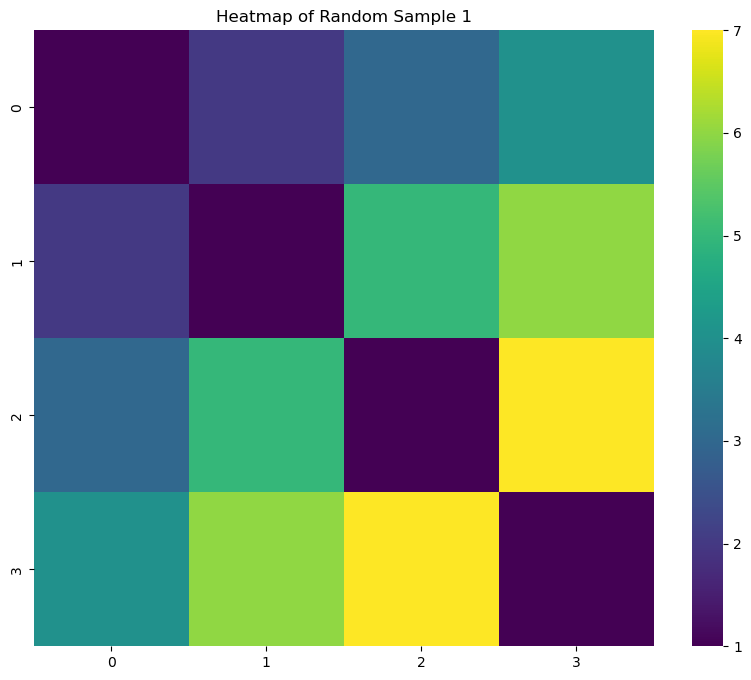

Recon_Mat
[[[1. 2. 3. 4.]
  [2. 1. 5. 6.]
  [3. 5. 1. 7.]
  [4. 6. 7. 1.]]

 [[1. 2. 3. 4.]
  [2. 1. 5. 6.]
  [3. 5. 1. 7.]
  [4. 6. 7. 1.]]]


In [10]:
#checking the function 

data_mat = np.array([[upper_traingle_vector],[upper_traingle_vector]])
print(data_mat.shape)
sym_recon  = vectomat(data_mat,4)
print('Recon_Mat')
print(sym_recon)


### Function to generate the symmetric matrix 

In [8]:

def vectomat_matlab(vector, outputdim):
    '''
    This code is to regenerate the symmetric functional connectivity matrix from the given vectorized upper triangular portion.
    This code accounts for the mismatch between MATLAB and Python indexing.

    vector: ndarray - the sample vector as a column vector (:,1)
    outputdim: scalar - the dimension of the symmetric matrix
    '''

    # Checking whether the vector dimension and the desired output dimensions match
    vector_length = vector.shape[0]
    desired_length = outputdim * (outputdim - 1) / 2

    # Check if lengths match and raise an error if not
    if vector_length != desired_length:
        raise ValueError("Vector length is insufficient to construct the symmetric matrix.")
    
    # Create a symmetric matrix with zeros
    matrix = np.zeros((outputdim, outputdim))
    
    p = 0

    for i in range(outputdim):
        for j in range (i,outputdim):
            if i == j:
                matrix[i,j] = 1
            else:
                matrix[i,j] = vector[p]
                matrix[j,i] = vector[p]
                p += 1
                
    return matrix

def samplestomat(dataset,outputdim):
    
    '''
    This code is developed to convert the vectorized data matrix in to a 3D data tensor.
    
    dataset : nd:array - (samples*features)
    outputdim : scalar

    '''

    #number of samples
    n_samples = dataset.shape[0]
    #3D matrix to hold the output
    out_dataset = np.zeros((n_samples,outputdim,outputdim))

    for p in range(n_samples):
        
        sample = dataset[p]
        sample = vectomat_matlab(sample,outputdim)
        out_dataset[p] = sample

    random_index = np.random.randint(0, n_samples)
    random_sample = out_dataset[random_index]

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(random_sample, cmap='viridis', cbar=True)
    plt.title(f'Heatmap of Random Sample {random_index}')
    plt.show()

    return out_dataset
        




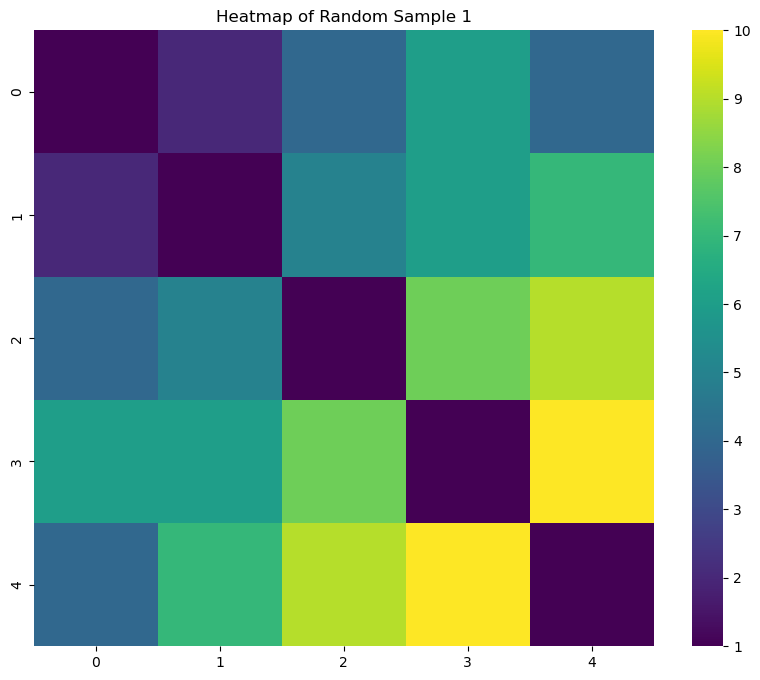

In [9]:
data_mat = np.array([[1,2,3,4,5,6,7,8,9,10],[2,4,6,4,5,6,7,8,9,10]])
outputdim = 5

out_data = samplestomat(data_mat,outputdim)

In [10]:
print(out_data)

[[[ 1.  1.  2.  3.  4.]
  [ 1.  1.  5.  6.  7.]
  [ 2.  5.  1.  8.  9.]
  [ 3.  6.  8.  1. 10.]
  [ 4.  7.  9. 10.  1.]]

 [[ 1.  2.  4.  6.  4.]
  [ 2.  1.  5.  6.  7.]
  [ 4.  5.  1.  8.  9.]
  [ 6.  6.  8.  1. 10.]
  [ 4.  7.  9. 10.  1.]]]


In [2]:

for i in range(outputdim):
    for j in range (i,outputdim):
        if i == j:
            print('Diagonal')
            print(i,j)
            print('-------')
        else:
            print(i,j)

Diagonal
0 0
-------
0 1
0 2
0 3
0 4
Diagonal
1 1
-------
1 2
1 3
1 4
Diagonal
2 2
-------
2 3
2 4
Diagonal
3 3
-------
3 4
Diagonal
4 4
-------
